# Basic Supervised Learning Algorithms Using Iris Dataset

This notebook explores basic data science operations and supervised learning algorithms using the classic Iris dataset:
* Naive Bayes
* Decision Tree

## Import basic libraries

* Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

* Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Using %matplotlib allows to display graphics inline instead of in a popup window.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load and explore Iris dataset

In [2]:
# The dataset does not have headers, so we provide them ourselves
df = pd.read_csv("./iris-dataset/iris.data", 
                 names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [3]:
df.shape

(150, 5)

In [4]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Definition of features

| Feature  | Description | Comments |
|--------------|-------------|--------|
| sepal_length     | Sepal length in cm   |
| sepal_width     | Sepal width in cm   |
| petal_length     | Petal length in cm   |
| petal_width     | Petal width in cm   |
| class     | Type of iris plant  | Iris Setosa, Iris Versicolour or Iris Virginica |

## Check for correlated features

Correlated features don't add any information, since they are expressing the same data in different ways.
Even worse, they can amplify bias.

In [6]:
def plot_correlation(df, size = 12):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

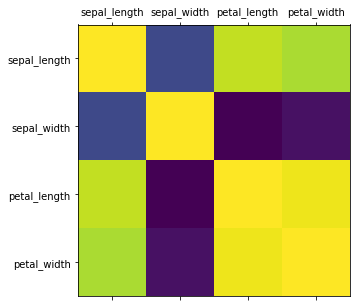

In [7]:
plot_correlation(df, 5)

## Mold the data

Change class from string to integer, Iris Setosa = 0, Iris Versicolour = 1 or Iris Virginica = 2

In [8]:
iris_class_map = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}
df['class'] = df['class'].map(iris_class_map)

In [9]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## Verify class distribution

In [11]:
num_obs = len(df)

num_iris_setosa = len(df.loc[df['class'] == 0])
num_iris_versicolour = len(df.loc[df['class'] == 1])
num_iris_virginica = len(df.loc[df['class'] == 2])

print("Number of Iris Setosa flowers: {0} ({1:2.2f}%)".format(num_iris_setosa, (num_iris_setosa / num_obs) * 100))
print("Number of Iris Versicolour flowers: {0} ({1:2.2f}%)".format(num_iris_versicolour, (num_iris_versicolour / num_obs) * 100))
print("Number of Iris Virginica flowers:  {0} ({1:2.2f}%)".format(num_iris_virginica, (num_iris_virginica / num_obs) * 100))

Number of Iris Setosa flowers: 50 (33.33%)
Number of Iris Versicolour flowers: 50 (33.33%)
Number of Iris Virginica flowers:  50 (33.33%)


## Visualize the data

### Class by sepal length, width

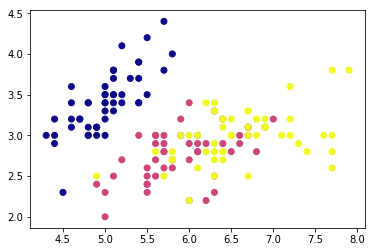

In [12]:
x = df.sepal_length
y = df.sepal_width

color = df['class']

plt.scatter(x, y, c = color, cmap='plasma')
plt.show()

### Class by petal length, width

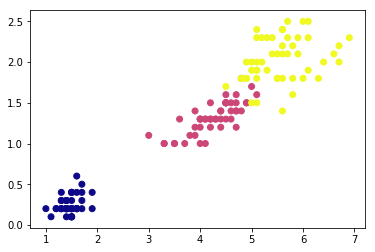

In [13]:
x = df.petal_length
y = df.petal_width

color = df['class']

plt.scatter(x, y, c = color, cmap='plasma')
plt.show()

## Split the data into training and testing set

70% for training, 30% for testing

In [14]:
from sklearn.model_selection import train_test_split

feature_column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
predicted_class_column_names = ['class']

X = df[feature_column_names].values
y = df[predicted_class_column_names].values

# 70% for training, 30% for testing
split_test_size = 0.30

# Random seed, to make the results always the same regardless of how many times we run this sheet
random_seed = 17

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=random_seed)

### Verify the split

In [15]:
print("{0:0.2f}% in training set".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100))

70.00% in training set
30.00% in test set


### Verify that predicted value was split correctly

In [16]:
print("Original Iris Setosa: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 0]), (len(df.loc[df['class'] == 0]) / len(df.index)) * 100.0))
print("Original Iris Versicolour: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 1]), (len(df.loc[df['class'] == 1]) / len(df.index)) * 100.0))
print("Original Iris Virginica: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 2]), (len(df.loc[df['class'] == 2]) / len(df.index)) * 100.0))
print("")
print("Training Iris Setosa: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0)))
print("Training Iris Versicolour: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0)))
print("Training Iris Virginica: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 2]), (len(y_train[y_train[:] == 2]) / len(y_train) * 100.0)))
print("")
print("Test Iris Setosa: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0)))
print("Test Iris Versicolour: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0)))
print("Test Iris Virginica: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 2]), (len(y_test[y_test[:] == 2]) / len(y_test) * 100.0)))

Original Iris Setosa: 50 (33.33%)
Original Iris Versicolour: 50 (33.33%)
Original Iris Virginica: 50 (33.33%)

Training Iris Setosa: 38 (36.19%)
Training Iris Versicolour: 31 (29.52%)
Training Iris Virginica: 36 (34.29%)

Test Iris Setosa: 12 (26.67%)
Test Iris Versicolour: 19 (42.22%)
Test Iris Virginica: 14 (31.11%)


## Check for null values

In [17]:
df.isnull().values.any()

False

## If there are missing valus, impute with the mean

In [18]:
# Not needed for this dataset

## Train the model

### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

#### Performance on training data

In [20]:
from sklearn import metrics

nb_predict_train = nb_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.9524


#### Performance on testing data

In [21]:
from sklearn import metrics

nb_predict_test = nb_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9778


#### Metrics

In [22]:
print("Confusion matrix\n")
print("{0}\n".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[0, 1, 2])))

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[0, 1, 2]))

Confusion matrix

[[12  0  0]
 [ 0 19  0]
 [ 0  1 13]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Visualize

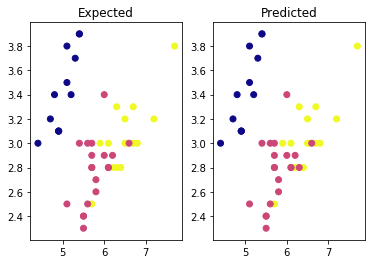

In [23]:
ax = plt.subplot(1, 2, 1)
ax.set_title("Expected")
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test[:, 0], cmap='plasma')

ax = plt.subplot(1, 2, 2)
ax.set_title("Predicted")
predicted = nb_model.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted, cmap='plasma')

plt.show()

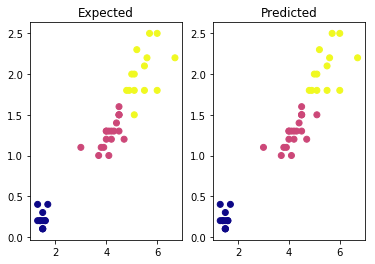

In [24]:
ax = plt.subplot(1, 2, 1)
ax.set_title("Expected")
plt.scatter(X_test[:, 2], X_test[:, 3], c = y_test[:, 0], cmap='plasma')

ax = plt.subplot(1, 2, 2)
ax.set_title("Predicted")
predicted = nb_model.predict(X_test)
plt.scatter(X_test[:, 2], X_test[:, 3], c = predicted, cmap='plasma')

plt.show()

### Decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Performance on training data

In [26]:
from sklearn import metrics

dt_predict_train = dt_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, dt_predict_train)))

Accuracy: 1.0000


#### Performance on testing data

In [27]:
from sklearn import metrics

dt_predict_test = dt_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, dt_predict_test)))

Accuracy: 1.0000


#### Metrics

In [28]:
print("Confusion matrix\n")
print("{0}\n".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[0, 1, 2])))

print("Classification Report")
print(metrics.classification_report(y_test, dt_predict_test, labels=[0, 1, 2]))

Confusion matrix

[[12  0  0]
 [ 0 19  0]
 [ 0  0 14]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

